In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 439 kB 49.1 MB/s 
     |████████████████████████████████| 1.7 MB 60.7 MB/s 
     |████████████████████████████████| 6.0 MB 64.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset=pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#divide dataset into independent and dependent feature
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [6]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
##Feature Engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [9]:
##concatinate those variable with dataframe
x=x.drop(['Geography','Gender'],axis=1)
x


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [10]:
x=pd.concat([x,geography,gender],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [15]:
x_train.shape

(8000, 11)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU
from tensorflow.keras.layers import Dropout

In [18]:
classifier=Sequential() #initialize the ANN
classifier.add(Dense(units=11,activation='relu'))#adding input layer

In [55]:
#adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [20]:
#adding second layer
classifier.add(Dense(units=6,activation='relu'))

In [21]:
#adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [26]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [45]:
from keras import callbacks
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3167 - accuracy: 0.8658 - val_loss: 0.3640 - val_accuracy: 0.8591
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3144 - accuracy: 0.8692 - val_loss: 0.3742 - val_accuracy: 0.8535
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3127 - accuracy: 0.8712 - val_loss: 0.3746 - val_accuracy: 0.8508
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3144 - accuracy: 0.8703 - val_loss: 0.3738 - val_accuracy: 0.8557
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3162 - accuracy: 0.8683 - val_loss: 0.3811 - val_accuracy: 0.8565
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3134 - accuracy: 0.8716 - val_loss: 0.3950 - val_accuracy: 0.8535
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3159 - accuracy: 0.8686 - val_loss: 0.3683 - val_accuracy:

In [41]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3216 - accuracy: 0.8675 - val_loss: 0.3646 - val_accuracy: 0.8546
Epoch 2/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3214 - accuracy: 0.8698 - val_loss: 0.3606 - val_accuracy: 0.8610
Epoch 3/50
536/536 [==============================] - 2s 5ms/step - loss: 0.3187 - accuracy: 0.8698 - val_loss: 0.3797 - val_accuracy: 0.8607
Epoch 4/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3204 - accuracy: 0.8692 - val_loss: 0.3720 - val_accuracy: 0.8603
Epoch 5/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3168 - accuracy: 0.8707 - val_loss: 0.3829 - val_accuracy: 0.8535
Epoch 6/50
536/536 [==============================] - 2s 5ms/step - loss: 0.3196 - accuracy: 0.8668 - val_loss: 0.3895 - val_accuracy: 0.8516
Epoch 7/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3193 - accuracy: 0.8716 - val_loss: 0.3880 - val_accuracy: 0.8565
Epoch 

In [46]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

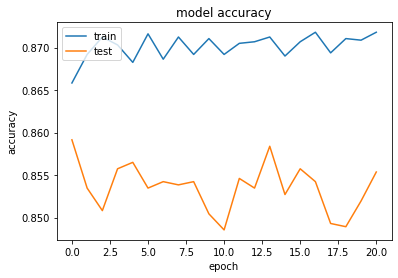

In [47]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

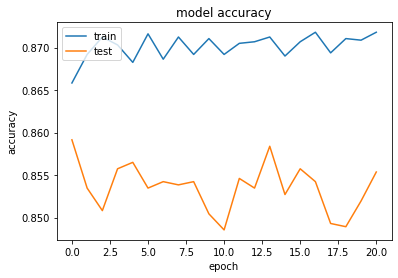

In [48]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1522,   73],
       [ 197,  208]])

In [52]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [53]:
score

0.865

In [54]:
classifier.get_weights()

[array([[ 0.07138406, -0.10198717, -0.57739156, -0.39068848, -0.609837  ,
         -0.07011495,  1.0335946 ,  1.0307121 , -0.61380255,  0.83815914,
          0.19529559],
        [ 5.7134943 , -2.7272189 ,  4.8622026 ,  1.2553048 ,  1.0640857 ,
          0.5801032 , -2.0836258 , -0.2254532 , -4.8480067 , -1.3654386 ,
          1.1228144 ],
        [-0.6838787 ,  0.02603872,  0.03409851, -1.1392399 ,  0.6155019 ,
          1.3813994 ,  0.4085448 ,  0.6089706 , -0.29385418,  1.8754231 ,
          2.1537633 ],
        [ 0.1748419 ,  1.652515  , -2.4475448 ,  4.628887  ,  1.7671589 ,
         -3.0832965 , -3.5047576 , -0.6670337 ,  0.06004933, -2.8544333 ,
          0.56713897],
        [ 2.4624674 ,  5.279962  , -4.3664074 ,  4.1960697 , -0.05362489,
          1.5483594 , -1.6186053 , -0.4991233 ,  3.2069013 ,  4.802575  ,
          5.3592834 ],
        [-0.28447825,  1.8021525 , -0.85709107,  0.20495804,  0.19855765,
         -0.8297963 ,  3.4544716 ,  0.38440678, -1.4506912 ,  0.5486195

In [50]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [44]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)